<a href="https://colab.research.google.com/github/YousefBarty/ML-Projects/blob/main/Adaline_Mini_batch_bankNote_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
df = pd.read_csv('/content/drive/MyDrive/banknote.txt', header=None, encoding='utf-8')

In [ ]:
x_train=np.concatenate((df.iloc[:512,[0,2]],df.iloc[762:1274,[0,2]].values))
y_train=np.concatenate((df.iloc[:512,4],df.iloc[762:1274,4].values))
y_train = np.where(y_train == 0, -1, 1)
print(x_train.shape)
print(y_train.shape)

(1024, 2)
(1024,)


In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [ ]:
class AdalineGD_MINI_CL():

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state    

    def fit(self, X, y):

        rgen = np.random.RandomState(self.random_state)
      
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        

        for j in range(self.n_iter):

          for i in range(2):
              net_input = self.net_input(X[i*512:(i+1)*512,:])  # Z
              output = self.activation(net_input) #W.T X >> phi(z) for all labels
              
              # calculate the gradient for every weight
              errors = (y[i*512:(i+1)*512] - output) # y-y(hat) .. for all label >> error for all i 


              update = self.eta * X[i*512:(i+1)*512,:].T.dot(errors) # for all the weights except w0 ( gradient Vector)
              self.w_[1:] = self.w_[1:] + update

              update_w0 = self.eta * errors.sum() # for w0
              
              self.w_[0] = self.w_[0] + update_w0
              cost = (errors**2).sum() / 2.0
              self.cost_.append(cost)
            
        return self

    def net_input(self, X):
        """Calculate net input"""
        '''
        z=np.dot(X,self.w_)
        return z
        '''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [ ]:
adaMINI1_CL=AdalineGD_MINI_CL(n_iter=10,eta=0.001)
adaMINI1_CL.fit(x_train,y_train)

In [ ]:
adaMINI1_CL1=AdalineGD_MINI_CL(n_iter=10,eta=0.0001)
adaMINI1_CL1.fit(x_train,y_train)

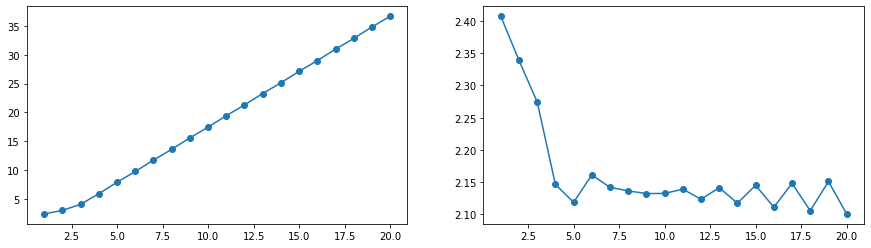

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
ax[0].plot(range(1,len(adaMINI1_CL.cost_)+1),np.log10(adaMINI1_CL.cost_),marker='o')
ax[1].plot(range(1,len(adaMINI1_CL1.cost_)+1),np.log10(adaMINI1_CL1.cost_),marker='o')

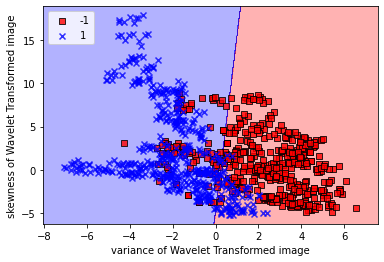

In [ ]:
plot_decision_regions(x_train, y_train, classifier=adaMINI1_CL1)
plt.xlabel('variance of Wavelet Transformed image')
plt.ylabel('skewness of Wavelet Transformed image')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [ ]:
x_test=np.concatenate((df.iloc[512:610,[0,2]],df.iloc[1274:1372,[0,2]].values))
y_test=np.concatenate((df.iloc[512:610,4],df.iloc[1274:1372,4].values))
y_test = np.where(y_test == 0, -1, 1)

In [ ]:
pre_values=adaMINI1_CL1.predict(x_test)

In [ ]:
print(pre_values.shape)

(196,)


In [ ]:
print(y_test.shape)

(196,)


In [ ]:
counter=0
for i in range(196):
  if pre_values[i]==y_test[i]:
    counter=counter+1

In [ ]:
print((counter/196)*100)

83.6734693877551


In [ ]:
class AdalineGD_MINI_CL_R():

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state    

    def fit(self, X, y):

        rgen = np.random.RandomState(self.random_state)
      
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(2):
          for j in range(self.n_iter):

         
              net_input = self.net_input(X[i*512:(i+1)*512,:])  # Z
              output = self.activation(net_input) #W.T X >> phi(z) for all labels
              
              # calculate the gradient for every weight
              errors = (y[i*512:(i+1)*512] - output) # y-y(hat) .. for all label >> error for all i 


              update = self.eta * X[i*512:(i+1)*512,:].T.dot(errors) # for all the weights except w0 ( gradient Vector)
              self.w_[1:] = self.w_[1:] + update

              update_w0 = self.eta * errors.sum() # for w0
              
              self.w_[0] = self.w_[0] + update_w0
              cost = (errors**2).sum() / 2.0
              self.cost_.append(cost)
            
        return self

    def net_input(self, X):
        """Calculate net input"""
        '''
        z=np.dot(X,self.w_)
        return z
        '''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [ ]:
adaMINI1_CL1_R1=AdalineGD_MINI_CL_R(n_iter=10,eta=0.001)
adaMINI1_CL1_R1.fit(x_train,y_train)

In [ ]:
adaMINI1_CL1_R=AdalineGD_MINI_CL_R(n_iter=10,eta=0.0001)
adaMINI1_CL1_R.fit(x_train,y_train)

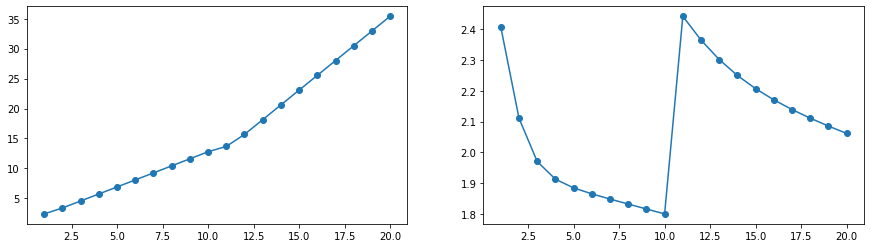

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
ax[0].plot(range(1,len(adaMINI1_CL1_R1.cost_)+1),np.log10(adaMINI1_CL1_R1.cost_),marker='o')
ax[1].plot(range(1,len(adaMINI1_CL1_R.cost_)+1),np.log10(adaMINI1_CL1_R.cost_),marker='o')

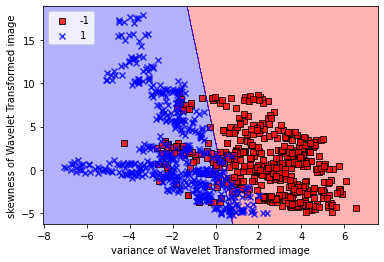

In [ ]:
plot_decision_regions(x_train, y_train, classifier=adaMINI1_CL1_R)
plt.xlabel('variance of Wavelet Transformed image')
plt.ylabel('skewness of Wavelet Transformed image')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [ ]:
pre_values=adaMINI1_CL1_R.predict(x_test)

In [ ]:
counter=0
for i in range(196):
  if pre_values[i]==y_test[i]:
    counter=counter+1

In [ ]:
print((counter/196)*100)

87.24489795918367
